<font>
<div dir=ltr align=center>
<img src='Sharif_logo.png' width=250 height=250> <br>
<font color=0F5298 size=7>
Applied Data Science<br>
<font color=2565AE size=5>
Spring 2025<br>
<font color=3C99D size=5>
HW2 - Data Cleaning & Exploratory Analysis <br>
<font color=696880 size=4>
Ali Mohammadzade Shabestari - 401106482 - Computer Engineering



# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Load Datasets

In [2]:
df_orders = pd.read_csv('Digikala Dataset/orders.csv')

In [3]:
df_orders.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [4]:
df_product = pd.read_excel('Digikala Dataset/product.xlsx')

In [5]:
df_product.head()

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes
0,723302,ماگ حرارتی لومانا مدل عرفانه کد MAG1042,NaN,ماگ-حرارتی-لومانا-مدل-عرفانه-کد-mag1042,mug، لیوان ، ماگ ، فنجان ، لیوان دسته دار ، لو...,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,لومانا,Lomana,"[{""Key"":""وزن بسته‌بندی"",""Value"":""480""},{""Key"":..."
1,727089,ست آبکش و آبگیر تیتیز مدل AP-9141 سایز متوسط,NaN,ست-آبکش-و-آبگیر-تیتیز-مدل-ap-9141-سایز-متوسط,";hsi, steel, کاسه، کاسه بامبو، لگن، کالا خانه ...",آبکش و آبگیر,آبکش و آبگیر VirgoBasin,تیتیز,Titiz,"[{""Key"":""دستگیره"",""Value"":""1 جفت""},{""Key"":""نوع..."
2,727096,روغن مرطوب کننده کدلی مدل Divine oil حجم 50 می...,NaN,روغن-مرطوب-کننده-کدلی-مدل-divine-oil-حجم-50-می...,NaN,روغن صورت,روغن صورت Face-Oil,کدلی,CAUDALIE,"[{""Key"":""حجم"",""Value"":""50""},{""Key"":""نوع عصاره""..."
3,727803,ست لحاف پوپلین هوبی مدل اما یکنفره چهار تکه کاوری,Hobby Emma Quilt Single Set - 4 Pieces,ست-لحاف-پوپلین-هوبی-مدل-اما-یکنفره-چهار-تکه-کاوری,روتختی اسپرت، اما، emma، روتختی یکنفره، لحاف ی...,سرویس خواب,سرویس خواب SleepSet,هوبی,Hobby,"[{""Key"":""ابعاد رو بالشی"",""Value"":""50×70""},{""Ke..."
4,725222,ماگ آبنبات رنگی مدل AR0143,NaN,ماگ-آبنبات-رنگی-مدل-ar0143,ماگ آبنبات رنگی،شذدشذشفقشدله،Mag Abnabatrangi,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,متفرقه,Miscellaneous,"[{""Key"":""در"",""Value"":""ندارد""},{""Key"":""جنس"",""Va..."


# 3. Data Inspection

In this section, we will inspect the data to understand its structure and properties.

Instead of `df.isnull().sum()` and `df.dtypes` we could use `df.info()` to get number of null values and data types of columns respectively. Since most columns represent ID and text (not numerical values that can be aggregated or analyzed statistically), calculating measures like mean, median, or standard deviation on these columns is **meaningless**. Hence, we disregard `df.describe()`.

In [6]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Order               200000 non-null  int64  
 1   ID_Customer            200000 non-null  int64  
 2   ID_Item                200000 non-null  int64  
 3   DateTime_CartFinalize  200000 non-null  object 
 4   Amount_Gross_Order     200000 non-null  float64
 5   city_name_fa           200000 non-null  object 
 6   Quantity_item          200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


In [7]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   product_title_fa    100000 non-null  object
 2   product_title_en    21165 non-null   object
 3   url_code            99983 non-null   object
 4   title_alt           77432 non-null   object
 5   category_title_fa   100000 non-null  object
 6   category_keywords   99740 non-null   object
 7   brand_name_fa       100000 non-null  object
 8   brand_name_en       100000 non-null  object
 9   product_attributes  3050 non-null    object
dtypes: int64(1), object(9)
memory usage: 7.6+ MB


In [8]:
print(f"Orders tables has {df_orders.duplicated().sum()} duplicated rows.")
print(f"Product tables has {df_product.duplicated().sum()} duplicated rows.")

Orders tables has 0 duplicated rows.
Product tables has 0 duplicated rows.


We observed that the `Orders` dataset has 200000 rows and 7 columns, while `Product` dataset has 100000 rows and 10 columns. Now, we will see unique values of each column.

In [9]:
df_orders.nunique()

ID_Order                 197631
ID_Customer              151634
ID_Item                   95232
DateTime_CartFinalize    197293
Amount_Gross_Order        22416
city_name_fa                906
Quantity_item                44
dtype: int64

It looks like that some products are purchased many times potentially by different customers. Also, some orders include multiple products. We will investigate this further in the next section.

In [10]:
df_product.nunique()

id                    100000
product_title_fa       97446
product_title_en       18356
url_code               97130
title_alt              42396
category_title_fa       1206
category_keywords       1185
brand_name_fa           2786
brand_name_en           2819
product_attributes      2967
dtype: int64

# 4. Data Cleaning

## 4.1. Cleaning `Orders` Table

As discussed earlier, there are no null values and duplicated rows in `Orders` table. So, we just need to convert datatype of `DateTime_CartFinalize` from `object` to `datetime64`.


In [11]:
dff_orders = df_orders.copy()

In [12]:
dff_orders['DateTime_CartFinalize'] = pd.to_datetime(df_orders['DateTime_CartFinalize'])

I think it's better to replace City names with their English format. So we load the `cities.xlsx` file that I purchased from [this website](https://fapool.ir/file/54346/) and create a mapping dictionary out of it. Then replace the city names in the `Orders` table.

* I also added province column to that dataset by myself.

In [13]:
df_cities = pd.read_excel('Digikala Dataset/cities.xlsx', sheet_name='Sheet1')
city_mapping = dict(zip(df_cities['city_fa'].str.replace(' ', ''), df_cities['city_en']))

In [14]:
# Insert English name of each city from cities.xlsx
dff_orders['city_name_fa'] = dff_orders['city_name_fa'].str.replace(' ', '')
dff_orders['city_name_fa'] = dff_orders['city_name_fa'].map(city_mapping)
dff_orders['city_name_fa'].fillna('Unknown', inplace=True)
dff_orders.rename(columns={'city_name_fa': 'city'}, inplace=True)

In [15]:
# Insert province of each city from cities.xlsx
province_mapping = dict(zip(df_cities['city_en'], df_cities['province']))
dff_orders['province'] = dff_orders['city'].map(province_mapping)

# Correction! ُThere exists a city of Khorramabad in Tonekabon, Mazandaran. But in Digikala dataset, Khorramabad is potentially the center of Lorestan province. So, in order to avoid mistake is analysis, we change this item manually. I hope there are no more mistakes :)
dff_orders.loc[dff_orders['city'] == 'Khorramabad', 'province'] = 'Lorestan'

In [16]:
dff_orders.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city,Quantity_item,province
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,Mahmudabad,1.0,Mazandaran
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,Khorramdarreh,1.0,Zanjan
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,Qarchak,1.0,Tehran
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,Qom,1.0,Qom
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,Tehran,1.0,Tehran


## 4.2. Cleaning `Products` Table

But for `Products` table we have to cope with null values.
- `product_title_en`: 78835 null values ---> We can drop this column.
- `url_code`: 17 null values ---> We can drop these records.
- `title_alt`: 22568 null values ---> Impute with `Unknown`. (Imputing with  `product_title_fa` is another option)
- `category_keywords`: 260 null values ---> Fill with `category_title_fa`.

In [17]:
dff_product = df_product.copy()

In [18]:
dff_product.drop(columns=['product_title_en', 'product_attributes'], inplace=True)

In [19]:
dff_product.dropna(subset=['url_code'], inplace=True)

In [20]:
dff_product['title_alt'].fillna('Unknown', inplace=True)

In [21]:
dff_product['category_keywords'].fillna(dff_product['category_title_fa'], inplace=True)

In [22]:
dff_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99983 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 99983 non-null  int64 
 1   product_title_fa   99983 non-null  object
 2   url_code           99983 non-null  object
 3   title_alt          99983 non-null  object
 4   category_title_fa  99983 non-null  object
 5   category_keywords  99983 non-null  object
 6   brand_name_fa      99983 non-null  object
 7   brand_name_en      99983 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.9+ MB


# 5. Exploratory Data Analysis

## 5. 1. Orders by City

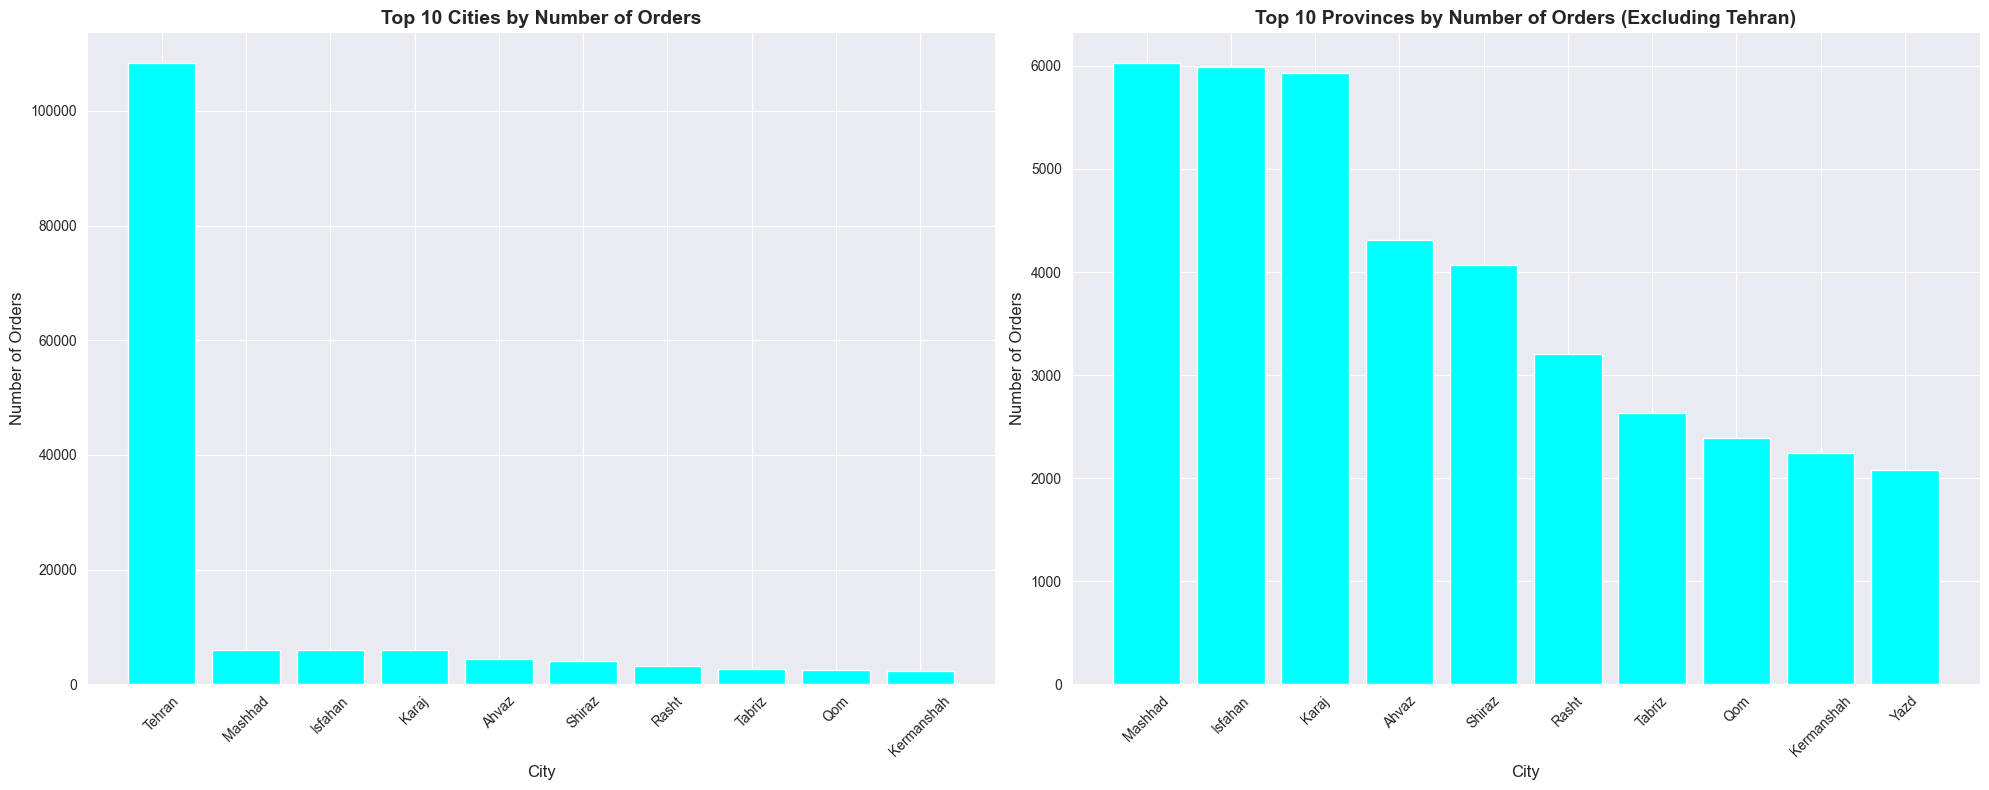

In [23]:
# Calculate total orders counts per each city in dataset
order_per_city = dff_orders['city'].value_counts().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the top 10 cities by number of orders
mc10 = order_per_city.head(10)
axes[0].bar(mc10.index, mc10.values, color='cyan')
axes[0].set_xlabel('City', fontsize=12)
axes[0].set_ylabel('Number of Orders', fontsize=12)
axes[0].set_title('Top 10 Cities by Number of Orders', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Plot the top 10 cities by number of orders excluding Tehran
mc11 = order_per_city[1:11]
axes[1].bar(mc11.index, mc11.values, color='cyan')
axes[1].set_xlabel('City', fontsize=12)
axes[1].set_ylabel('Number of Orders', fontsize=12)
axes[1].set_title('Top 10 Provinces by Number of Orders (Excluding Tehran)', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Now, we will plot the percentage of orders by city.

<Axes: ylabel='proportion'>

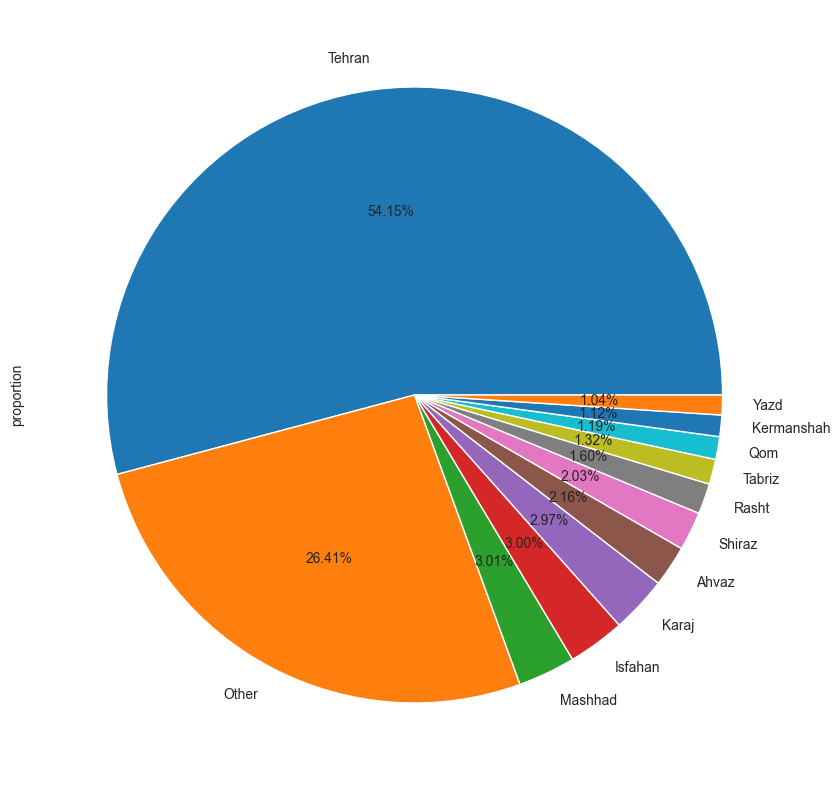

In [24]:
# Calculate the percentage of orders from each city
city_order_percentages = dff_orders['city'].value_counts(normalize=True) * 100

# Plot the top 10 cities by percentage of orders, while grouping all cities with less than 1 percent as Others
other_cities = city_order_percentages[city_order_percentages < 1].index
city_counts_grouped = city_order_percentages.copy()
city_counts_grouped.index = city_counts_grouped.index.where(~city_counts_grouped.index.isin(other_cities), 'Other')
city_counts_grouped = city_counts_grouped.groupby(city_counts_grouped.index).sum()
city_counts_grouped = city_counts_grouped.sort_values(ascending=False)

city_counts_grouped.plot(kind='pie', autopct='%1.2f%%', figsize=(10, 10))

- Tehran is the most significant contributor, making up more than half of the total metric. This suggests tha Tehran is a key area of focus or activity in the dataset.

- Mashhad, Isfahan, and Karaj are the next most important cities, accounting for around 9% of the total.

- According to [this reference](https://www.magiran.com/article/2806861) there are 9 official metropolises (کلان‌شهر) in Iran, including: Tehran, Mashhad, Isfahan, Karaj, Tabriz, Shiraz, Ahvaz, Qom, and Kermanshah. These cities are the most populous and developed cities in Iran. The dataset seems to be consistent with this information; beacuase these cities, as well as Rasht, are among the top 10 cities in terms of number of orders.

- It's noteworthy that the `Other` category is the second-largest contributor to the total metric. This suggests that despite the presence of large cities solely, there are many small cities that contribute significantly to the total number of orders.

## 5. 2. Orders by Province

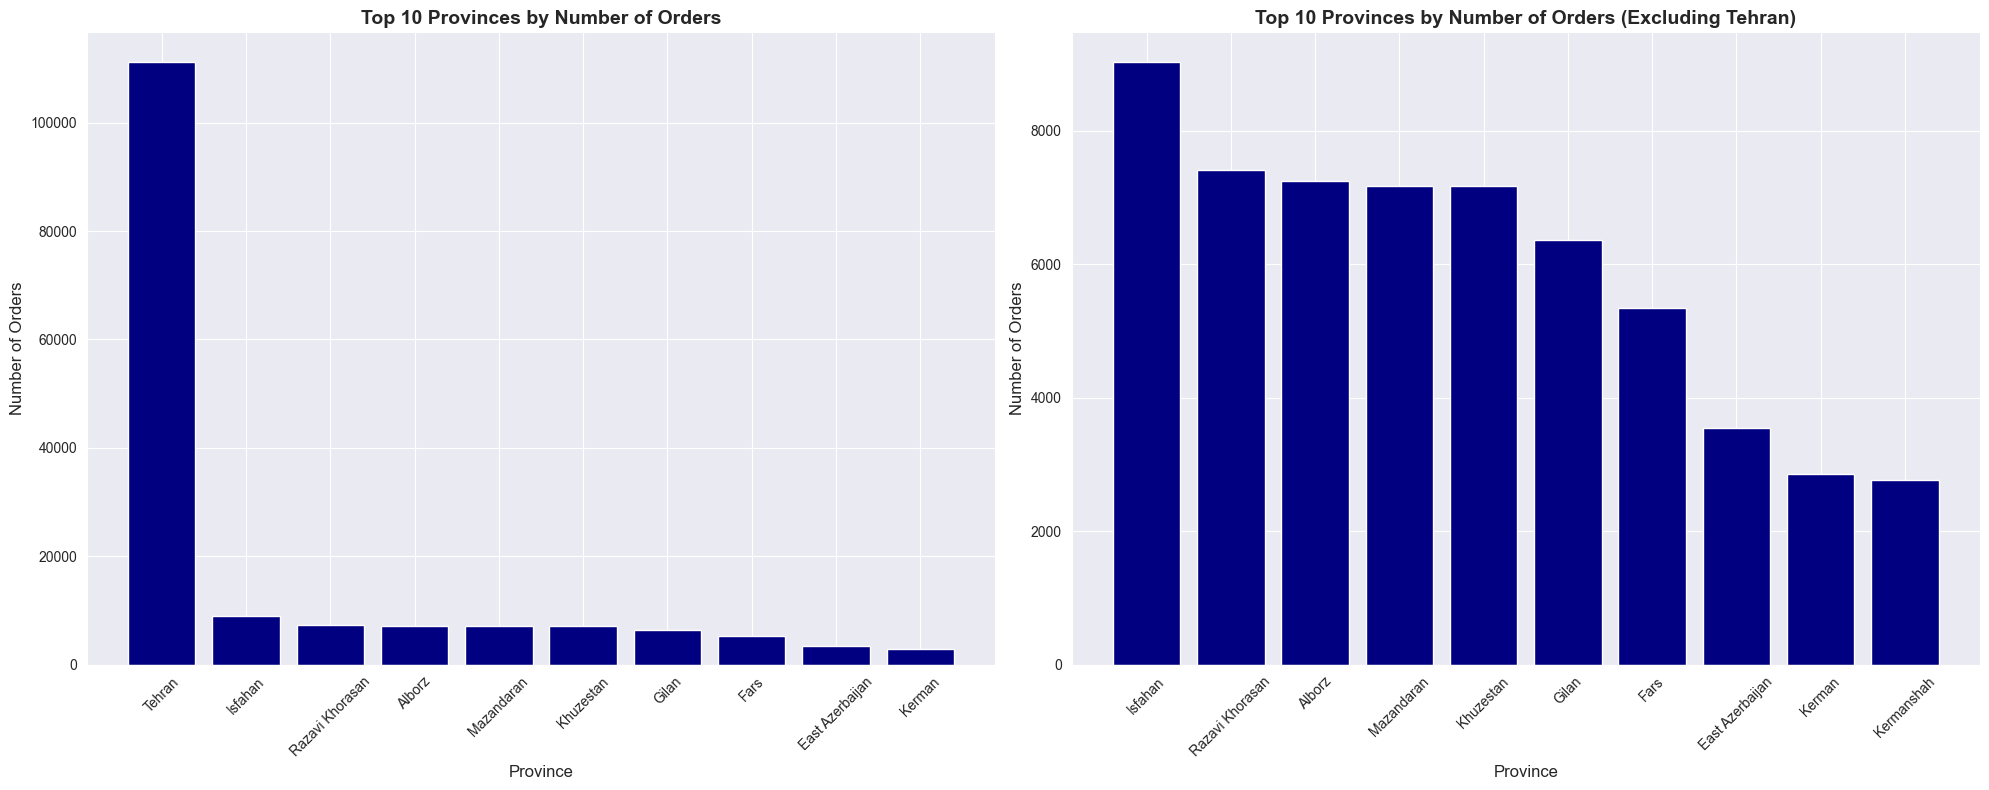

In [25]:
# Calculate total orders counts per each province in dataset
order_per_province = dff_orders['province'].value_counts()
order_per_province = order_per_province.sort_values(ascending=False).rename("order_count")

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Top 10 provinces
mp10 = order_per_province.head(10)
axes[0].bar(mp10.index, mp10.values, color='navy')
axes[0].set_xlabel('Province', fontsize=12)
axes[0].set_ylabel('Number of Orders', fontsize=12)
axes[0].set_title('Top 10 Provinces by Number of Orders', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Top 10 provinces excluding Tehran (2 to 11)
mp11 = order_per_province[1:11]
axes[1].bar(mp11.index, mp11.values, color='navy')
axes[1].set_xlabel('Province', fontsize=12)
axes[1].set_ylabel('Number of Orders', fontsize=12)
axes[1].set_title('Top 10 Provinces by Number of Orders (Excluding Tehran)', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Axes: ylabel='order_count'>

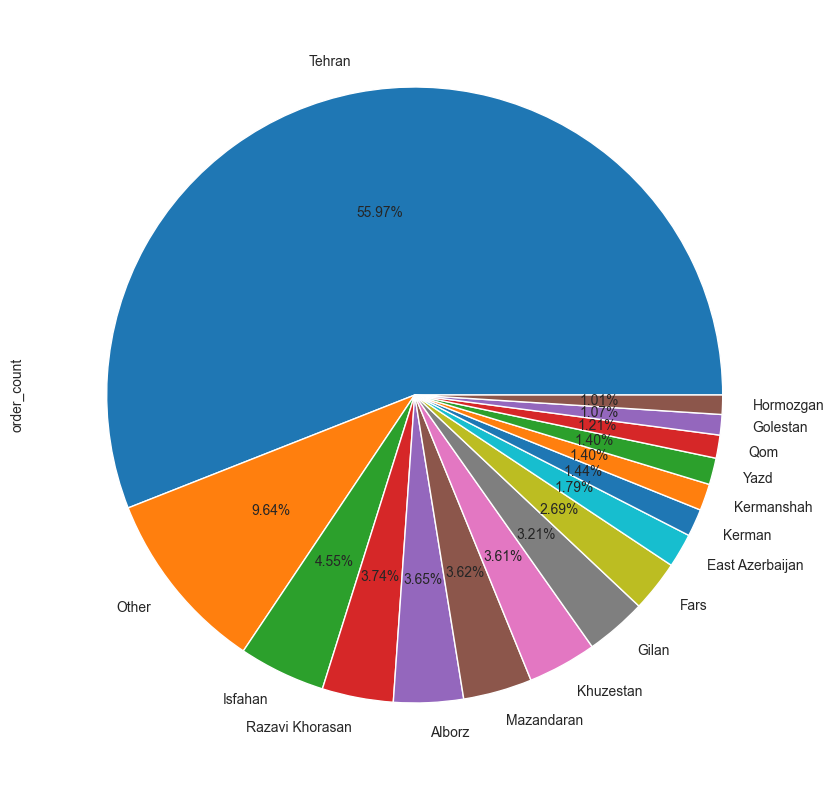

In [26]:
# Calculate the percentage of orders from each province
province_order_percentages = order_per_province / order_per_province.sum() * 100

# Mark provinces with less than 1 percent as Other
other_provinces = province_order_percentages[province_order_percentages < 1].index
province_counts_grouped = province_order_percentages.copy()
province_counts_grouped.index = province_counts_grouped.index.where(~province_counts_grouped.index.isin(other_provinces), 'Other')
province_counts_grouped = province_counts_grouped.groupby(province_counts_grouped.index).sum()
province_counts_grouped = province_counts_grouped.sort_values(ascending=False)

province_counts_grouped.plot(kind='pie', autopct='%1.2f%%', figsize=(10, 10))

- Tehran province is the most significant contributor, making up more than half of the total metric. Comparing to percentage of Tehran city, we conclude that not only most of the orders in Tehran province belong to Tehran city, but most orders of whole country belong to Tehran city. This suggests that Tehran is a key area of focus or activity in the dataset.
- Unlike the city analysis, Mazandaran is the fifth-largest contributor to the total metric. Now Let's see the distribution of orders by city in Mazandaran and other provinces.

In [27]:
# Get the all cities by the number of orders
tops = dff_orders['city'].value_counts().reset_index()

# Add a new column for the percentage of orders
tops['percentage'] = tops['count'] / tops['count'].sum() * 100

# Include only cities with more than 0.01 percent
tops = tops[tops['percentage'] > 0.01]

# Add a new column for the province of each city
tops['province'] = tops['city'].map(province_mapping)

# Count the number of orders for each province in the top 300 cities
provinces_diversity = tops['province'].value_counts().sort_values(ascending=False).reset_index()

print(provinces_diversity)

                      province  count
0                   Mazandaran     27
1                        Gilan     22
2                       Tehran     21
3                      Isfahan     21
4                    Khuzestan     18
5                         Fars     16
6              Razavi Khorasan     16
7                   Kermanshah     12
8                       Kerman     12
9                      Bushehr     10
10             West Azerbaijan     10
11                   Hormozgan     10
12                    Golestan     10
13                      Alborz     10
14             East Azerbaijan     10
15                   Kordestan      9
16                    Lorestan      9
17                        Yazd      9
18                     Hamedan      8
19                     Markazi      8
20                     Ardabil      7
21              North Khorasan      6
22      Sistan and Baluchestan      6
23                        Ilam      5
24   Chaharmahal and Bakhtiari      5
25          

In [28]:
# Calculate median percentage per province to sort them
province_medians = tops.groupby("province", observed=True)["percentage"].median().sort_values()

# Convert 'province' to a categorical type with sorting order
tops["province"] = pd.Categorical(tops["province"], categories=province_medians.index, ordered=True)
tops1 = tops[tops['city'] != 'Tehran']

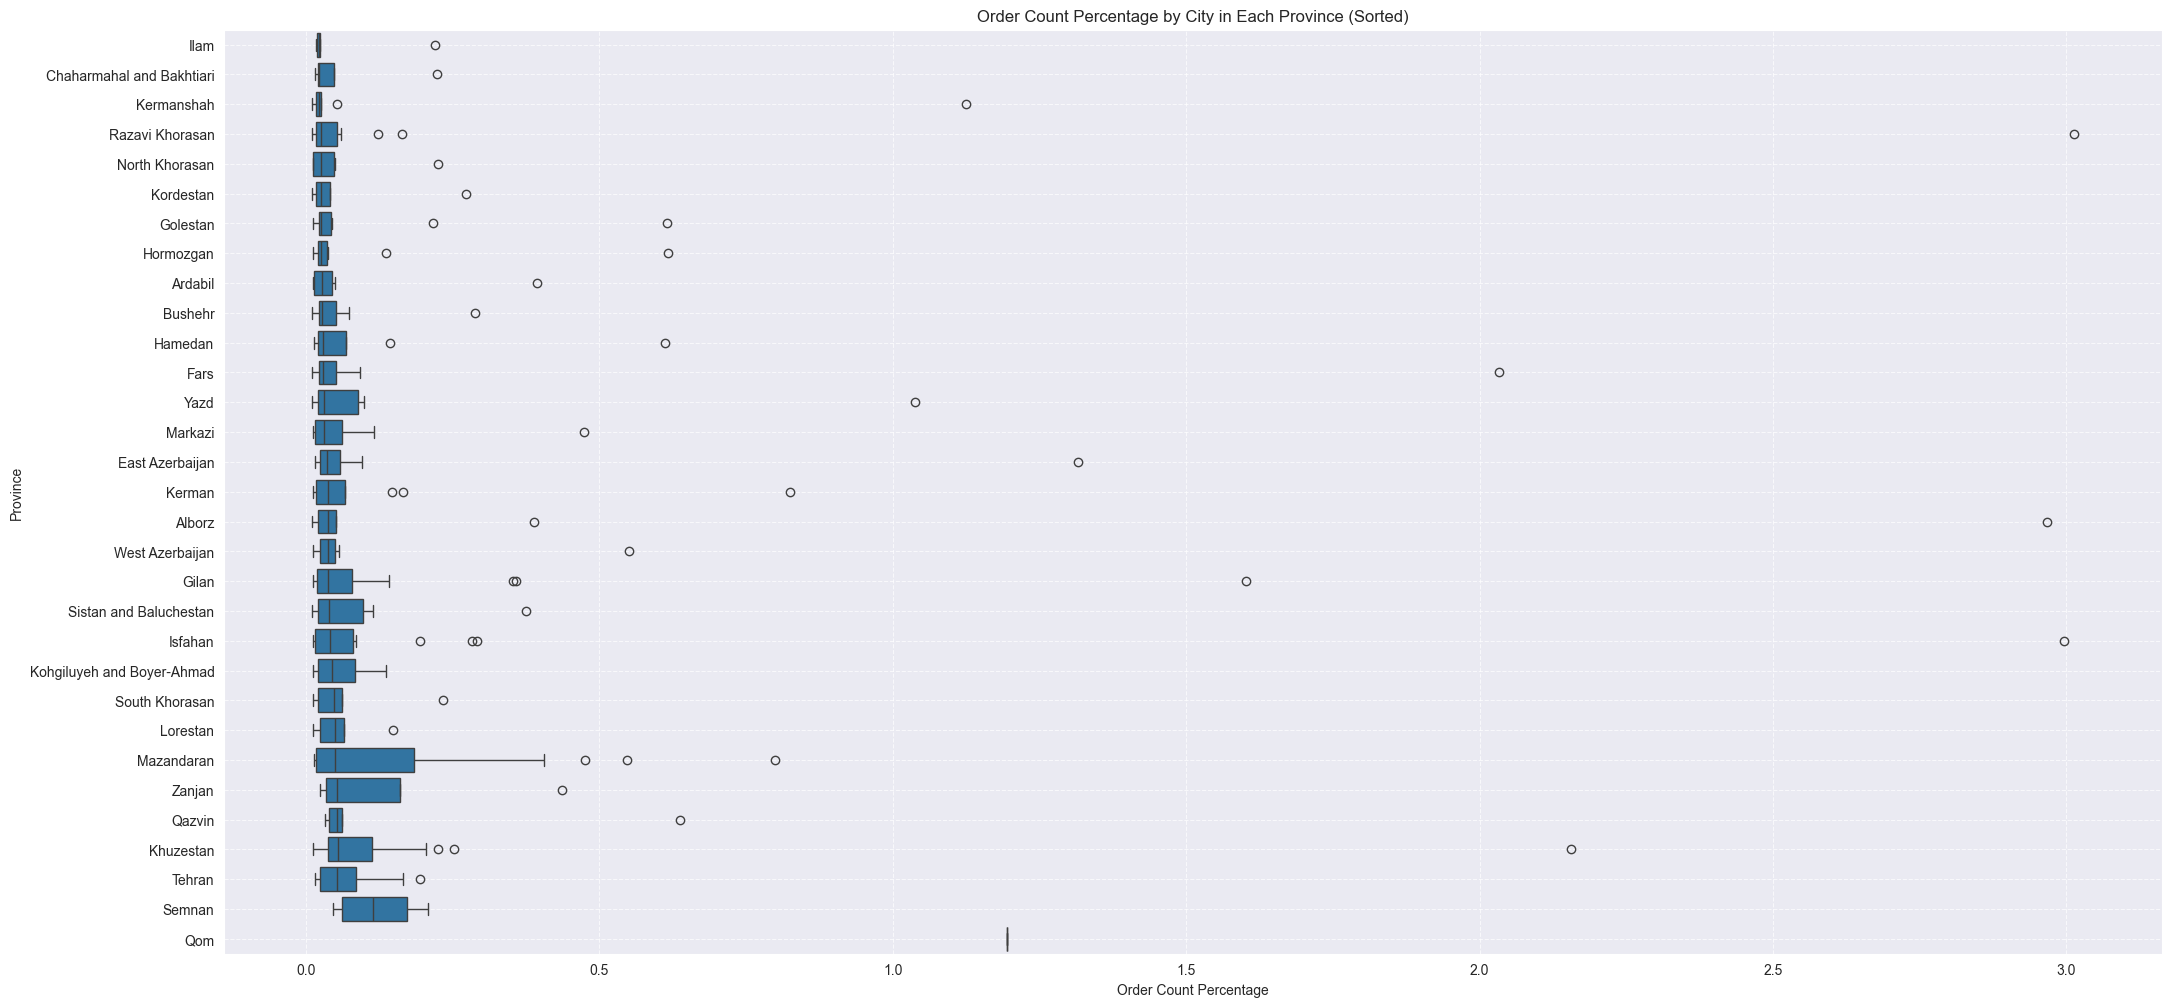

In [29]:
# Plot the sorted boxplot with outliers
plt.figure(figsize=(25, 12))
sns.boxplot(x='percentage', y='province', data=tops1, orient='h')
plt.title('Order Count Percentage by City in Each Province (Sorted)')
plt.xlabel('Order Count Percentage')
plt.ylabel('Province')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

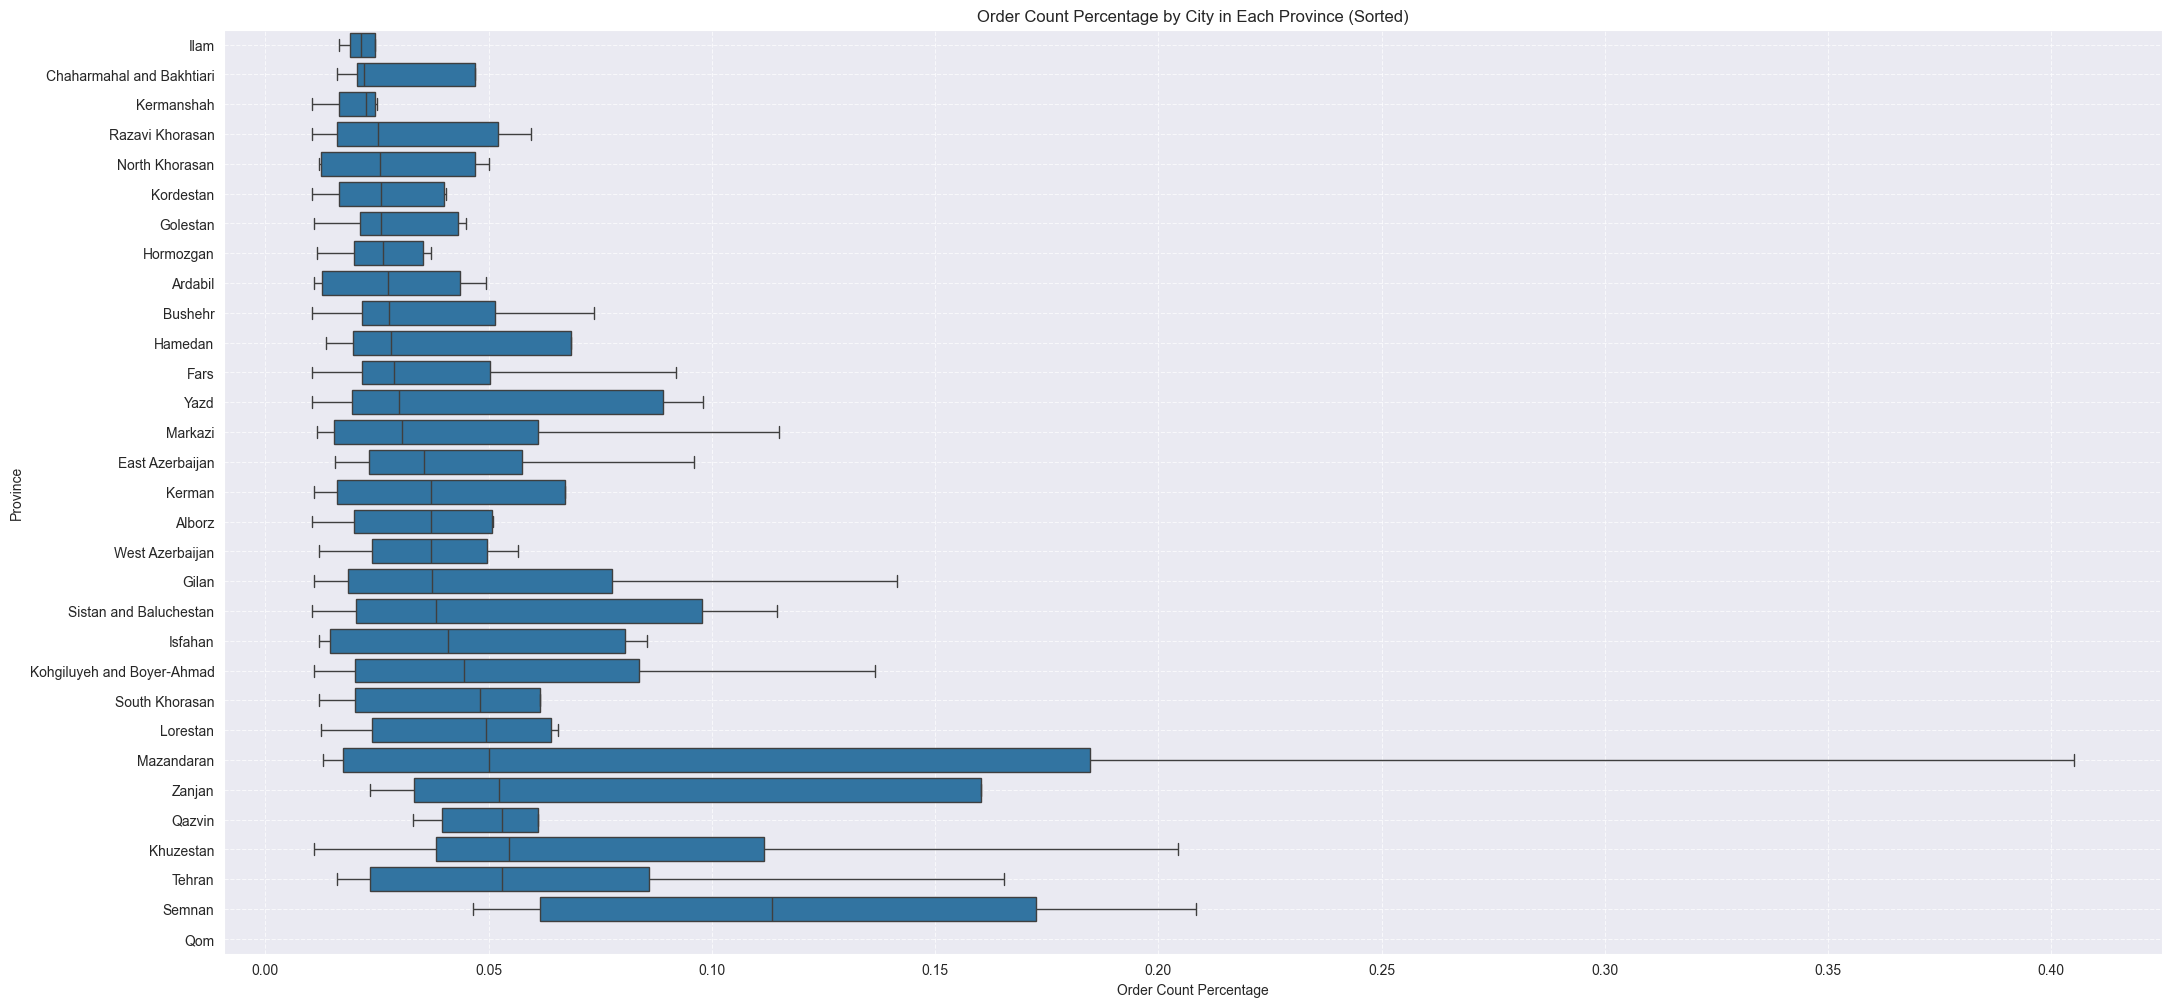

In [30]:
# Plot the sorted boxplot with outliers + exclude Qom
top2 = tops1[tops1['province'] != 'Qom']

plt.figure(figsize=(25, 12))
sns.boxplot(x='percentage', y='province', data=top2, orient='h', showfliers=False)
plt.title('Order Count Percentage by City in Each Province (Sorted)')
plt.xlabel('Order Count Percentage')
plt.ylabel('Province')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The boxplot shows interesting results that might not be immediately apparent from the pie chart.

- Semnan has the highest median, as well as a long interquartile range (IQR), indicating a wide spread of order percentages. This suggests that there are cities in Semnan with both high and low order percentages. Looking at the `province_diversity` table we see that however there are only four important cities in Semnan province, the minimum percentage of orders in these cities is higher than median of some provinces! This indicates that Semnan is a province with high order percentages, but not many cities.

- Mazandaran has a high median, long IQR and a long whisker, indicating a wide spread of order percentages. This suggests that there are cities in Mazandaran with both very high and very low order percentages.

- Tehran has a high median, but a shorter IQR and whisker, indicating that, excluding Tehran city, most other cities still make up a good proportion of orders in country.

- Qom has a high median, but a very short IQR and whisker. This result along with `province_diversity` table, indicates that Qom has only one city (Qom) and it makes up a good proportion of orders in country.

- Ilam has the lowest median and the shortest IQR and whisker, indicating that Ilam is a province with low order percentages and few important cities.

- Qazvin and Zanjan have less number of cities than Ilam, but their median (and IQR for Zanjan) is higher. What's the reason for this? Geographically, Qazvin and Zanjan are located in the north of Iran, while Ilam is located in the west. This suggests that the location of a province may have an impact on the order percentages. I also think the economic situation and popuation of a province may have an impact on the order percentages. However, I don't have enough information to make a conclusion about this. So, I will gather data about population, location and economic situation of provinces and analyze them in the next section.

## 5. 3. Orders by Province Population *

I collected data of provinces population and GDP from wikipedia: [source1](https://fa.wikipedia.org/wiki/%D9%81%D9%87%D8%B1%D8%B3%D8%AA_%D8%A7%D8%B3%D8%AA%D8%A7%D9%86%E2%80%8C%D9%87%D8%A7%DB%8C_%D8%A7%DB%8C%D8%B1%D8%A7%D9%86_%D8%A8%D8%B1_%D9%BE%D8%A7%DB%8C%D9%87_%D8%AA%D9%88%D9%84%DB%8C%D8%AF_%D9%86%D8%A7%D8%AE%D8%A7%D9%84%D8%B5_%D8%AF%D8%A7%D8%AE%D9%84%DB%8C) and [source2](https://fa.wikipedia.org/wiki/%D9%81%D9%87%D8%B1%D8%B3%D8%AA_%D8%A7%D8%B3%D8%AA%D8%A7%D9%86%E2%80%8C%D9%87%D8%A7%DB%8C_%D8%A7%DB%8C%D8%B1%D8%A7%D9%86)

In [31]:
province_info = pd.read_excel('Digikala Dataset/province_info.xlsx', sheet_name='Sheet1')

In [32]:
pp = order_per_province.copy()[1:] # exclude Tehran

# Merge province_population_counts with province_population on the 'province' column
pp = pp.reset_index().merge(province_info[province_info.columns[:-1]], on='province')

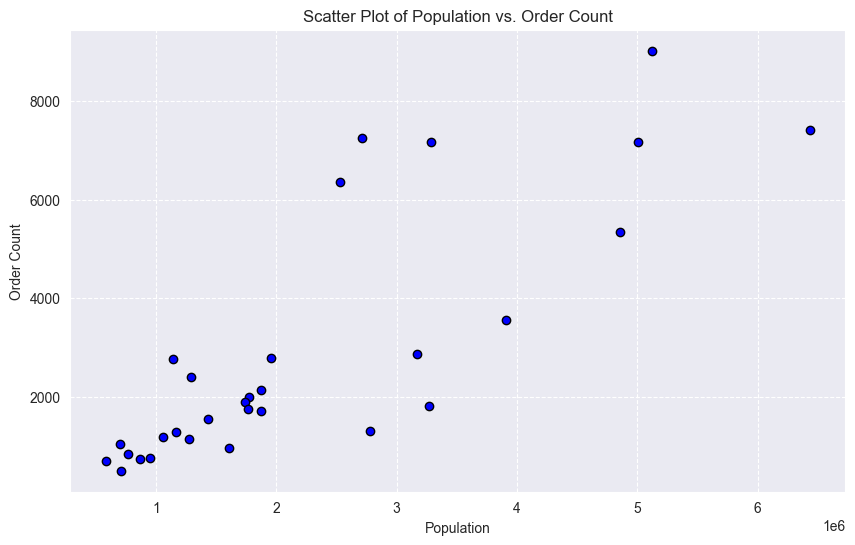

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(pp['population'], pp['order_count'], color='blue', edgecolor='black')

plt.title('Scatter Plot of Population vs. Order Count')
plt.xlabel('Population')
plt.ylabel('Order Count')
plt.grid(True, linestyle='--')

plt.show()

In [34]:
correlation = pp['order_count'].corr(pp['population'])

correlation

0.8183057921223121

The correlation coefficient is close to 1, indicating a strong positive linear relationship between population and order count. Note that we omitted Tehran because it's value is extremely high and may affect plot and correlation a lot.

* The correlation including Tehran is about 0.85.

## 5. 4. Orders by Province Location *

I donwloaded `.shp` file of Iran provinces from [this website](https://data.humdata.org/dataset/cod-ab-irn).

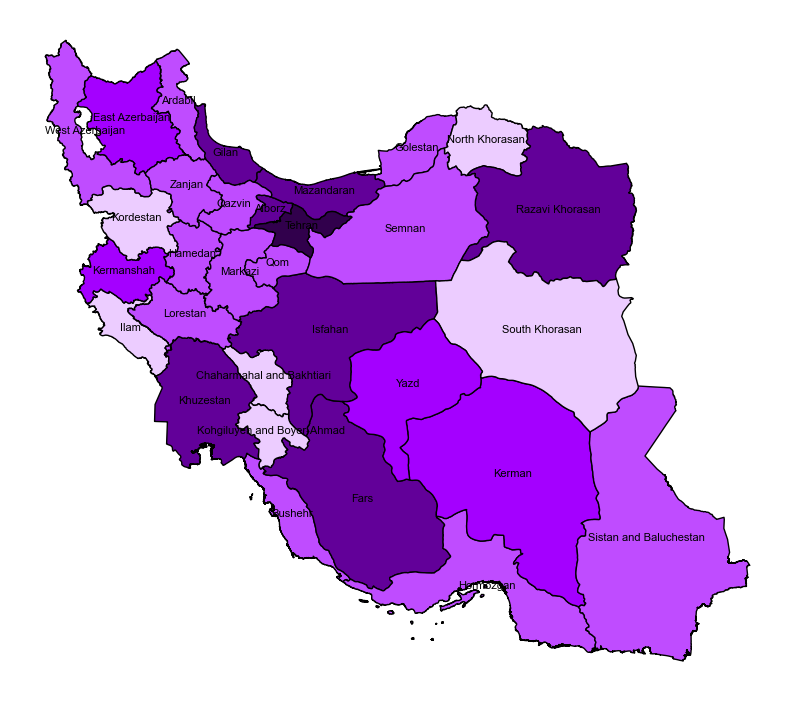

In [35]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load Iran shapefile
iran = gpd.read_file("./irn_adm_unhcr_20190514_shp/irn_admbnda_adm1_unhcr_20190514.shp")
iran = iran.sort_values(by="ADM1_EN", ascending=True)
# Define province names and pr values
dat = order_per_province.copy().reset_index()
dat = dat.sort_values(by="province", ascending=True)
iran['ADM1_EN'] = dat['province'].values

# Merge `dat` into `iran` using province names to align them
dat = iran.merge(dat, left_on="ADM1_EN", right_on="province", how="left")

# Compute centroids for label placement
dat = dat.to_crs(epsg=32639)  # UTM Zone 39N (common for Iran)
dat["centroid"] = dat.geometry.centroid

# Extract coordinates for labeling
dat["x"] = dat["centroid"].x
dat["y"] = dat["centroid"].y

# Assign colors based on order count values. This function behaves strangely and IDK why. *_*
def assign_color(x):
    if x <= 1000:
        return "#ecccff"
    elif x <= 2500:
        return "#bf4cff"
    elif x <= 5000:
        return "#a400ff"
    elif x <= 10000:
        return "#620099" 
    else:
        return "#31004c" 

dat["color_province"] = dat["order_count"].apply(assign_color)

# Plot
fig, ax = plt.subplots(figsize=(10, 12))
dat.plot(ax=ax, color=dat["color_province"], edgecolor="black")

# Add province labels
for _, row in dat.iterrows():
    ax.text(row["x"], row["y"], row["ADM1_EN"], fontsize=8, ha="center", color="black")

ax.set_axis_off()
plt.show()

The heatmap does not convey any useful message imao. :(

It would be better to investigate other factors.

## 5. 5. Orders by Province GDP *

In [36]:
# Create a Dataframe of province, order_count and GDP
gdp = order_per_province.copy()[1:]
gdp = gdp.reset_index().merge(province_info.drop(columns=['population']), on='province')
gdp = gdp.sort_values(by='GDP', ascending=False)

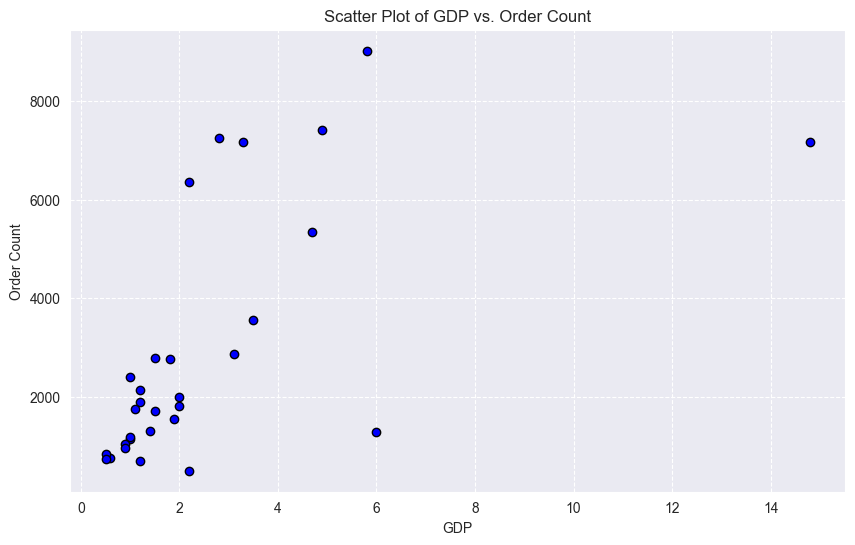

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(gdp['GDP'], gdp['order_count'], color='blue', edgecolor='black')

plt.title('Scatter Plot of GDP vs. Order Count')
plt.xlabel('GDP')
plt.ylabel('Order Count')
plt.grid(True, linestyle='--')

plt.show()

In [38]:
correlation2 = gdp['order_count'].corr(gdp['GDP'])

correlation2

0.6183090077643033

There correlation coefficient implies that the higher the GDP, does not necessarily mean the higher order count. However, in some cases it does.

## 5. 6. Orders by Time

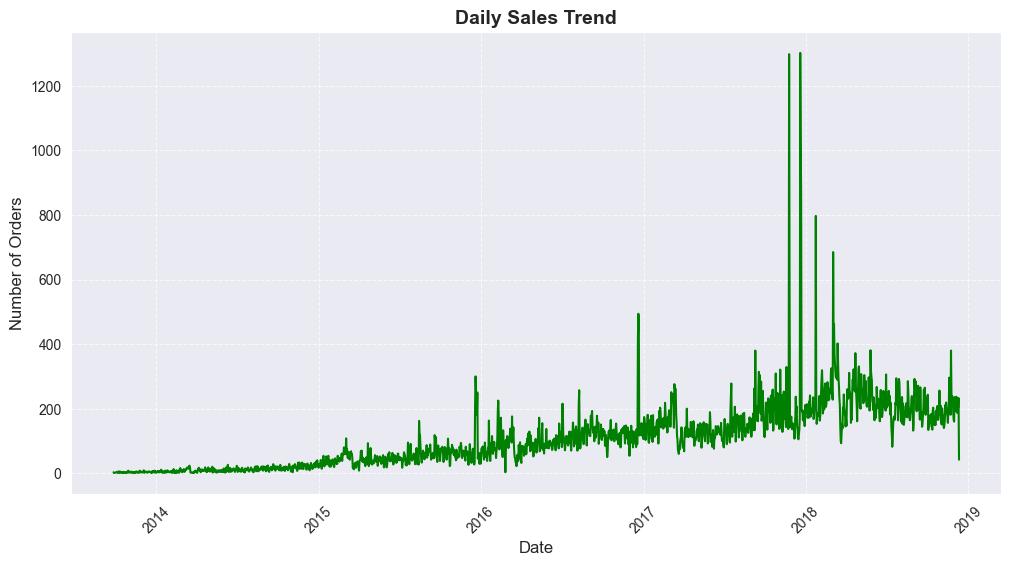

In [39]:
# Extract dates
dates = dff_orders['DateTime_CartFinalize'].dt.date

# Count number of orders per day + sort
orders_per_day = dates.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(orders_per_day.index, orders_per_day.values, color='green')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Daily Sales Trend', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

Digikala has grown its business significantly over the years, as evidenced by the increasing number of orders. The data shows a consistent upward trend in sales, with a notable spike in the last month of each year. This suggests that Digikala has been successful in attracting more customers and increasing its sales volume over time. Nevertheless, the trend in 2018 was not as good as previous years.

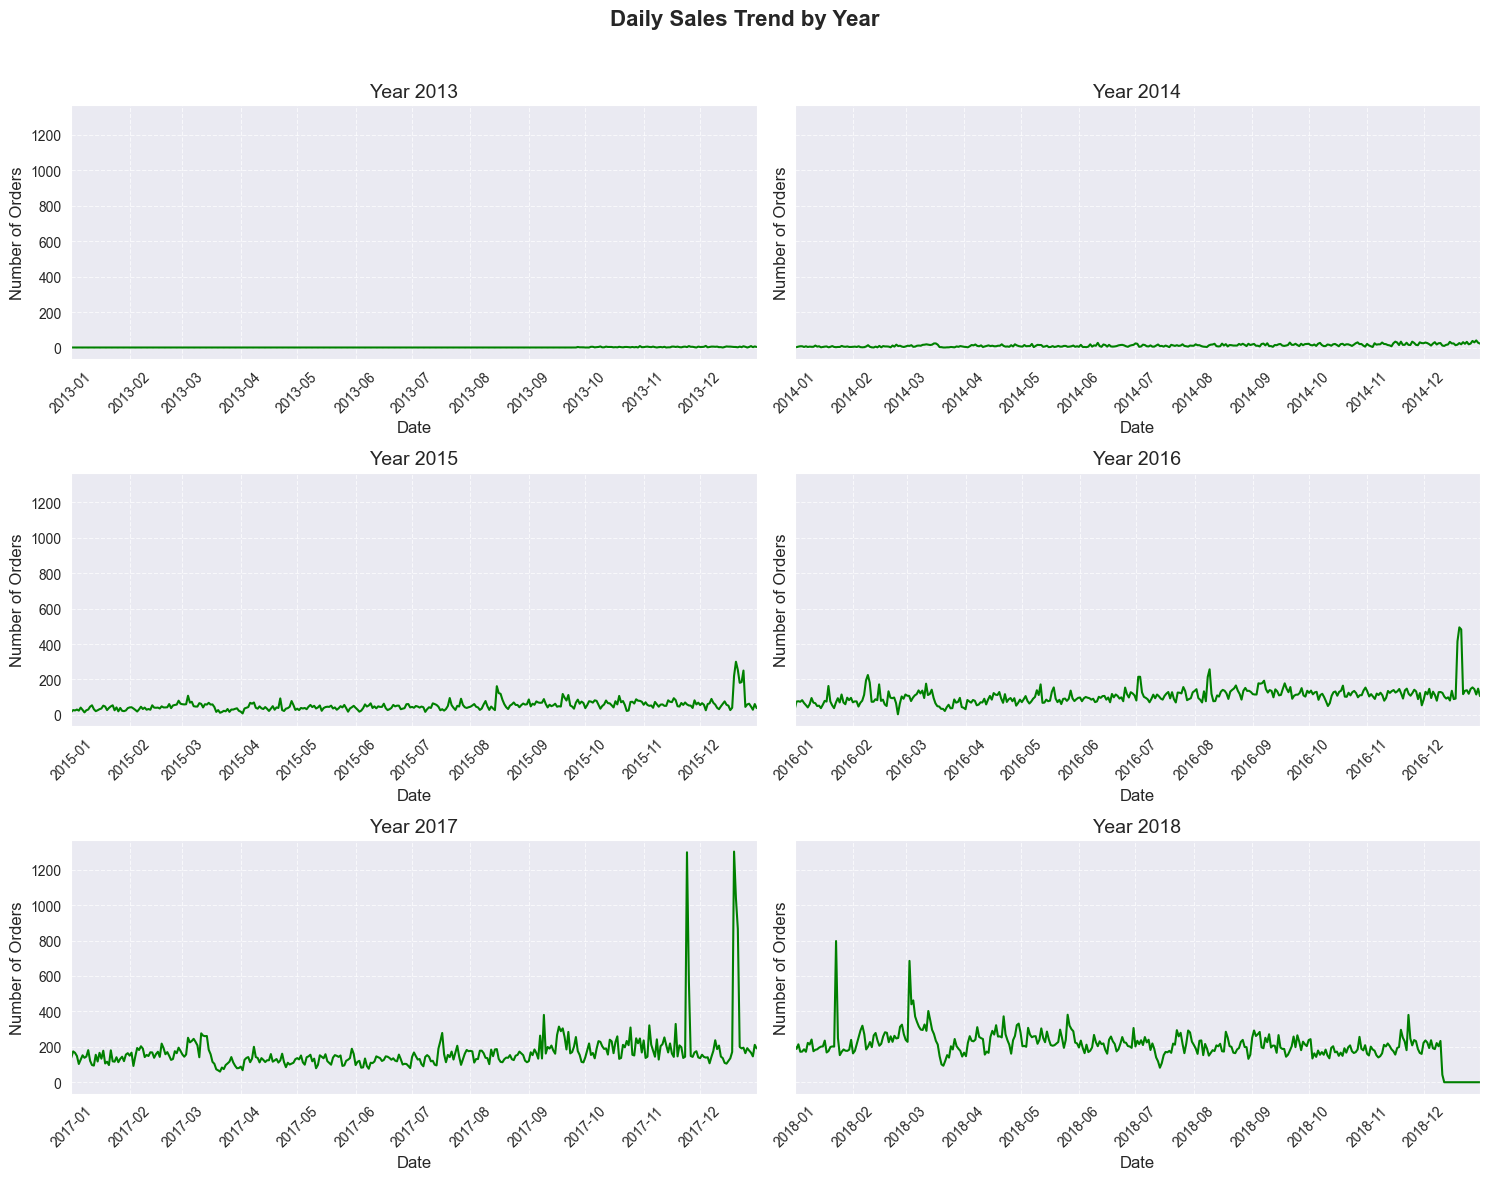

In [40]:
# Extract year and date from DateTime_CartFinalize
dff_orders['year'] = dff_orders['DateTime_CartFinalize'].dt.year
dff_orders['date'] = dff_orders['DateTime_CartFinalize'].dt.date

# Create a 3x2 subplot layout
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=False, sharey=True)
fig.suptitle('Daily Sales Trend by Year', fontsize=16, fontweight='bold')

# Sort years in ascending order
years = sorted(dff_orders['year'].unique())

# Iterate through each year and plot
for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]  # Get the correct subplot

    # Filter data for the year
    yearly_data = dff_orders[dff_orders['year'] == year]

    # Count orders per day
    orders_per_day = yearly_data.groupby('date').size()

    # Create a full date range for the year (fills missing days)
    full_date_range = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')
    orders_per_day = orders_per_day.reindex(full_date_range, fill_value=0)  # Fill missing days with 0

    # Plot
    ax.plot(orders_per_day.index, orders_per_day.values, color='green')
    ax.set_title(f'Year {year}', fontsize=14)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Number of Orders', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Set x-axis limits from January 1st to December 31st
    ax.set_xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))

    # Rotate x-axis labels for readability
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots if years < 6
for j in range(i + 1, 6):
    fig.delaxes(axes[j // 2, j % 2])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

By analyzing the plots, we see that there is a dramatic increase in number of orders around end of Gregorian year. Blackfriday and Yalda are my strongest assumption for this phenomenon.

But, we expect to see a similar increase in the end of Persian year (March 20th). Although there is a little increase before third month of year, it is still not comparable to the increase around end of Gregorian year.

Looking at the big plot, we see that there are some extreme valleys. By matching those intervals in year plots, an extreme value is visible after March mid-month, which is equivalent to 25 Esfand ~ 5 Farvardin. Most markets are closed or reduce activity in that interval, specially from 29 Esfand to 5 Farvardin. Therefore, those valleys are not surprising. :)

Another expectation is before new academic year (September 23rd). As expected, we see a small increase during August and September.

These are strong evidences that Blackfriday (Yalda) and new year official holidays are the main reason for increase and decrease in orders in year respectively.

## 5. 7. Orders by Price

Now, let's plot histogram of prices.

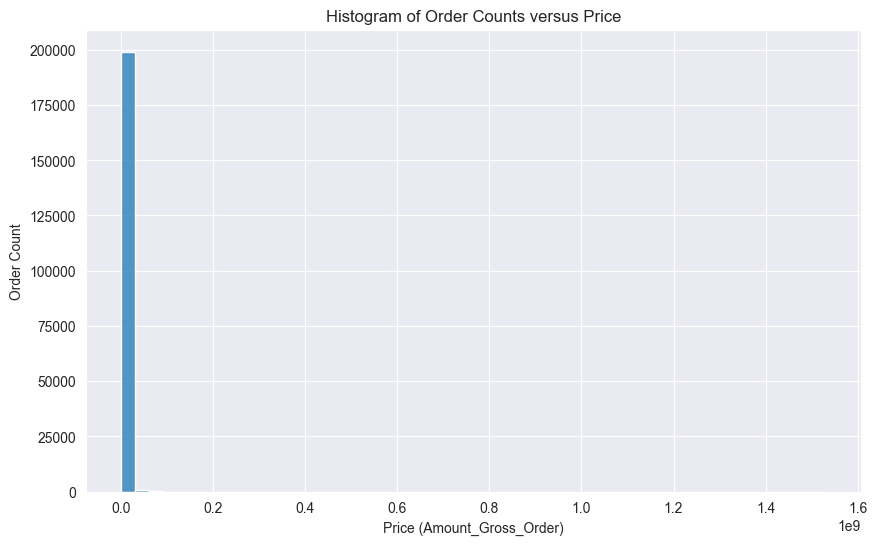

In [41]:
# Plot histogram of order counts versus price
plt.figure(figsize=(10, 6))
sns.histplot(dff_orders['Amount_Gross_Order'], bins=50, kde=False)
plt.xlabel('Price (Amount_Gross_Order)')
plt.ylabel('Order Count')
plt.title('Histogram of Order Counts versus Price')
plt.show()

Hmm, it looks like that the plot is right skewed extremely. After some investigation, I understood that there might be a little number of very high prices that are present in the right of plot. So, I decided to plot a histogram for each quartile separately.

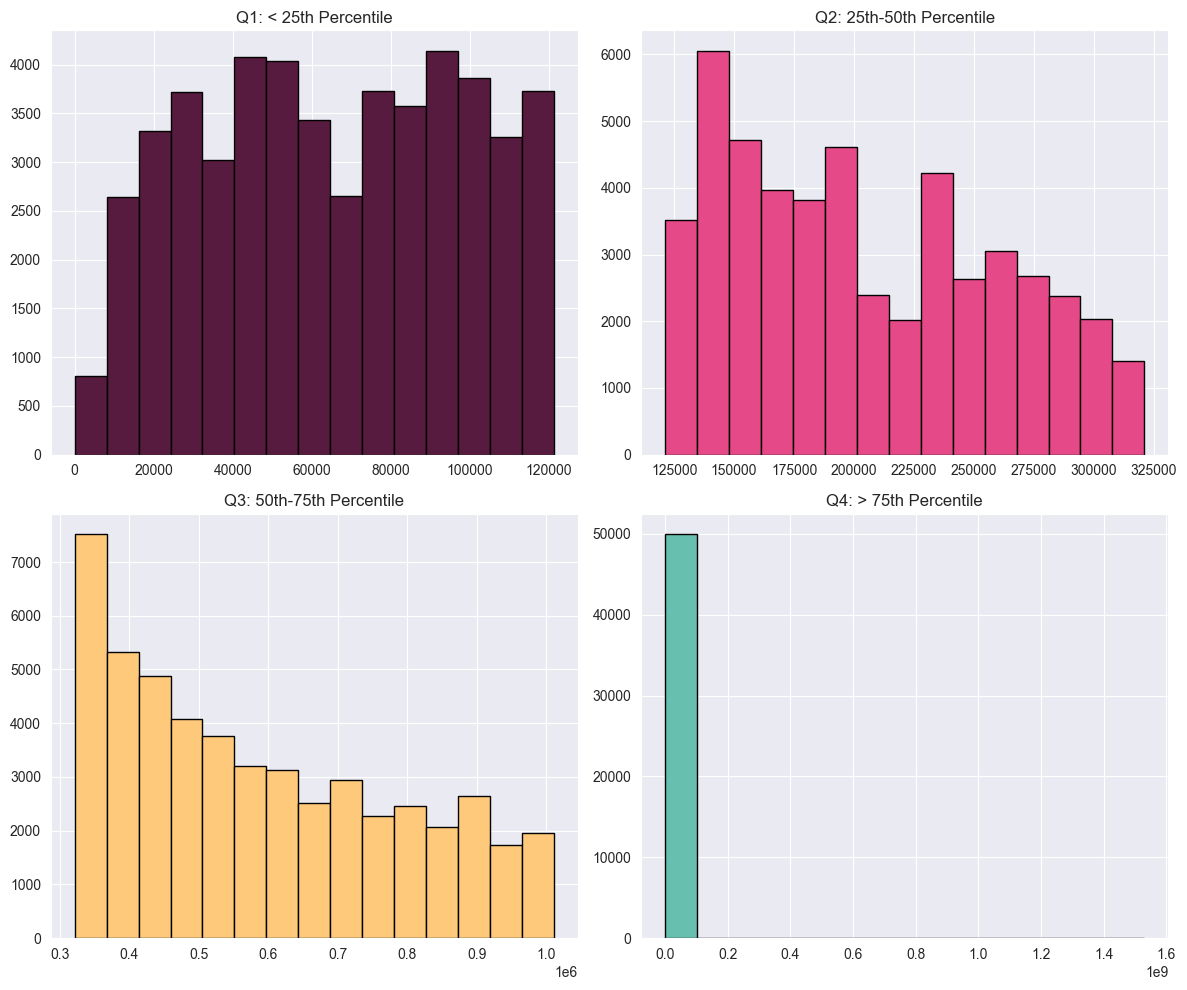

In [42]:
# Calculate quartiles
prices = dff_orders['Amount_Gross_Order']
q1 = prices.quantile(0.25)
q2 = prices.median()  # Q2 (50th percentile)
q3 = prices.quantile(0.75)

# Divide data into quartiles
q1_data = dff_orders[prices < q1]['Amount_Gross_Order']
q2_data = dff_orders[(prices >= q1) & (prices < q2)]['Amount_Gross_Order']
q3_data = dff_orders[(prices >= q2) & (prices < q3)]['Amount_Gross_Order']
q4_data = dff_orders[prices >= q3]['Amount_Gross_Order']

# Create subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

quartile_data = [q1_data, q2_data, q3_data, q4_data]
titles = ['Q1: < 25th Percentile', 'Q2: 25th-50th Percentile', 'Q3: 50th-75th Percentile', 'Q4: > 75th Percentile']
colors = ['#571b3f', '#e54988', '#fec97b', '#67bfaf']


# Plot histograms and disable scientific notation
for ax, data, title, color in zip(axes.flatten(), quartile_data, titles, colors):
    ax.hist(data, bins=15, color=color, edgecolor='black')
    ax.set_title(title)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


According to the last plot, there a few extreme values (outliers) in the fourth quartile.

Now We will see plot of first and second and third quartile at once.

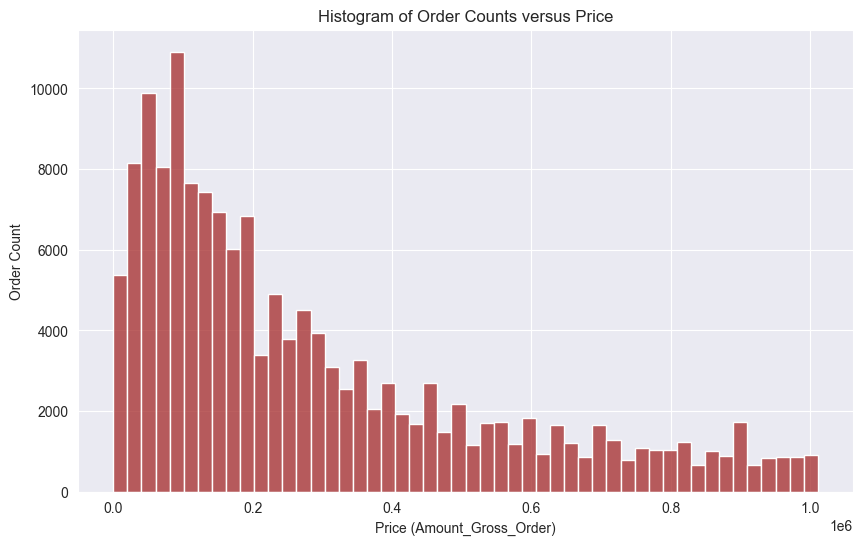

In [43]:
q123_data = dff_orders[prices <= q3]

plt.figure(figsize=(10, 6))
sns.histplot(q123_data['Amount_Gross_Order'], bins=50, color='brown')
plt.xlabel('Price (Amount_Gross_Order)')
plt.ylabel('Order Count')
plt.title('Histogram of Order Counts versus Price')
plt.show()


But for the fourth quartile, we split it into for quartiles and then plot it again.


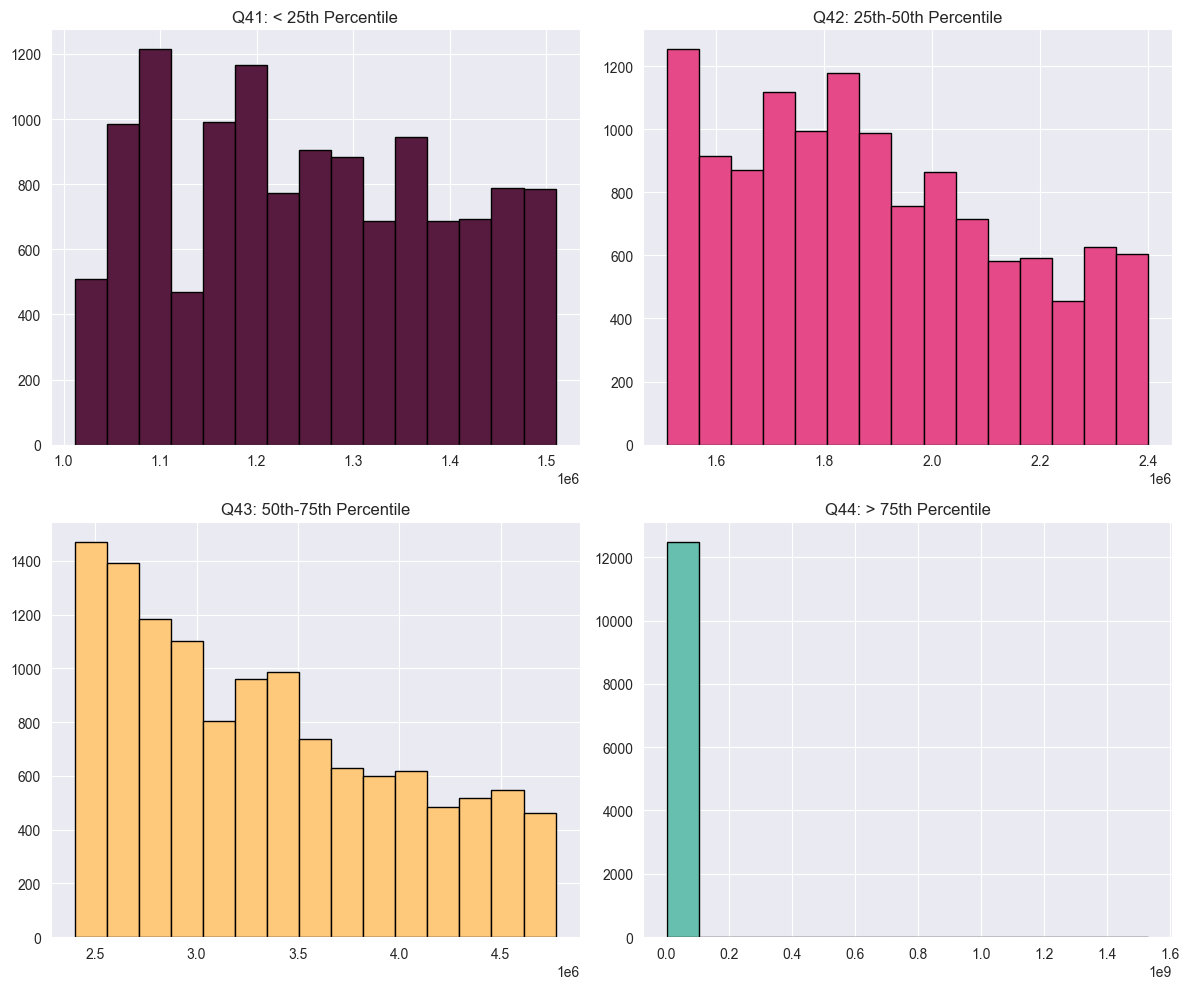

In [44]:
# Calculate quartiles
q41 = q4_data.quantile(0.25)
q42 = q4_data.median()  # Q2 (50th percentile)
q43 = q4_data.quantile(0.75)

# Divide data into quartiles
q41_data = q4_data[prices < q41]
q42_data = q4_data[(prices >= q41) & (prices < q42)]
q43_data = q4_data[(prices >= q42) & (prices < q43)]
q44_data = q4_data[prices >= q43]

# Create subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

quartile_data = [q41_data, q42_data, q43_data, q44_data]
titles = ['Q41: < 25th Percentile', 'Q42: 25th-50th Percentile', 'Q43: 50th-75th Percentile', 'Q44: > 75th Percentile']
colors = ['#571b3f', '#e54988', '#fec97b', '#67bfaf']


# Plot histograms and disable scientific notation
for ax, data, title, color in zip(axes.flatten(), quartile_data, titles, colors):
    ax.hist(data, bins=15, color=color, edgecolor='black')
    ax.set_title(title)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


We detected that the fourth quartile has huge values. Just see that the maximum price is 1530000000 times greater than the minimum price. That's why plotting all prices at once is resulting in an extremely right skewed histogram.

In [45]:
max_price = dff_orders['Amount_Gross_Order'].max()
min_price = dff_orders[dff_orders['Amount_Gross_Order'] > 0]['Amount_Gross_Order'].min()
print(max_price / min_price)

1530000000.0


Let's see if we can solve this issue with mean normalization.

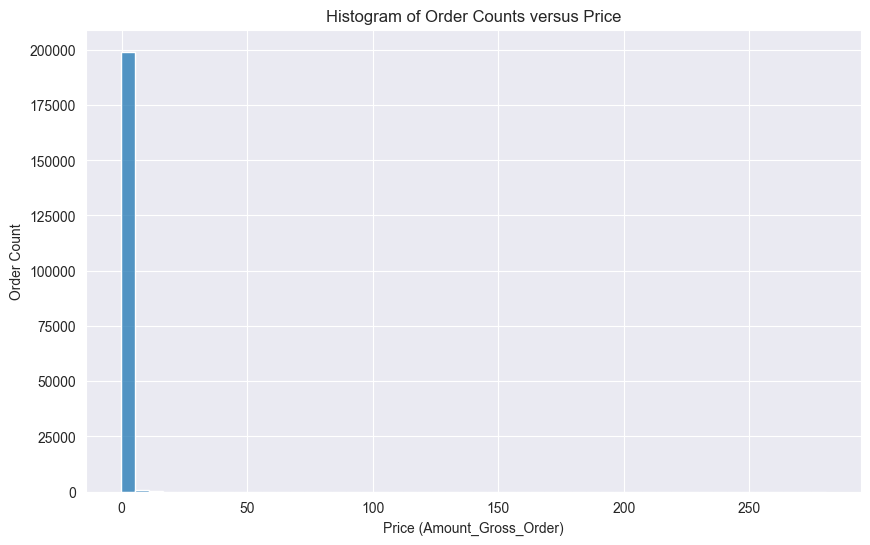

In [46]:
normalized_prices = (dff_orders['Amount_Gross_Order'] - dff_orders['Amount_Gross_Order'].mean()) / dff_orders['Amount_Gross_Order'].std()

# Plot histogram of order counts versus price
plt.figure(figsize=(10, 6))
sns.histplot(normalized_prices, bins=50, kde=False)
plt.xlabel('Price (Amount_Gross_Order)')
plt.ylabel('Order Count')
plt.title('Histogram of Order Counts versus Price')
plt.show()

No improvement! It's rational, because normalization just changes values, not frequency (or bins) of them.

Let's try logarithmic transformation to make it a little more symmetric.

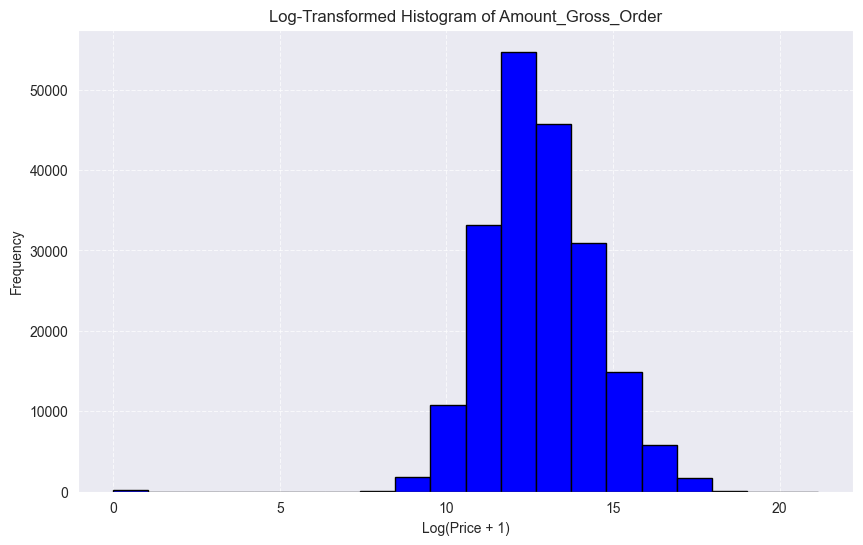

In [47]:
import numpy as np
log_data = np.log(dff_orders['Amount_Gross_Order'] + 1)  # Adding 1 to avoid log(0)

# Plot histogram of the log-transformed data
plt.figure(figsize=(10, 6))
plt.hist(log_data, bins=20, color='blue', edgecolor='black')
plt.title('Log-Transformed Histogram of Amount_Gross_Order')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The logarithmic plot, as well as Q123 plot, tell us that:

- Orders with prices around 0 and 20,000 Toman were frequent. Some orders are also up to 100,000 toman but their frequency decreases.

- According to the logarithmic plot, the peak is related to 12. So, price = e^12 - 1 ≈ 15,000 Toman was the most frequent price for an order.

- Keep in mind that a customer may order several items, and the total price is calculated by summing up prices of each order. Therefore, the prices in plot do not indicate net price for a cart.

## 5. 8. Popular Product

In [48]:
# Group by 'ID_Item' and calculate the total order amount for each item
grouped_orders = dff_orders.groupby('ID_Item')['Quantity_item'].sum()

# Find the top 5 items with the highest total order amounts
item_quantity = grouped_orders.sort_values(ascending=False).reset_index()

# Find the top 10 items with the highest total order amounts
item_quantity.head(10)

,ID_Item,Quantity_item
0,143130,996.0
1,294942,553.0
2,36871,463.0
3,258611,377.0
4,51778,348.0
5,245223,344.0
6,45121,322.0
7,416448,307.0
8,230209,301.0
9,8289,282.0


Unfortunately the products dataset does not include all products that are present in orders dataset. So, we cannot obtain name of the products above. I tried to search the website and extract names through web scraping. But most of those products were disabled (or potentially changed). Below you see name of common products whose names exist in dataset.

In [49]:
merged_df = pd.merge(item_quantity, df_product, left_on='ID_Item', right_on='id', how='inner')

merged_df[['product_title_fa', 'Quantity_item']]

,product_title_fa,Quantity_item
0,تی شرت مردانه رادیکال کد 3140,214.0
1,کتاب شاهنامه7 فریدون و پسرانش اثر سیدرضا تهامی,108.0
2,جامدادی یوتاب طرح اسلیمی کد 02,63.0
3,مگنت و کاغذ یادداشتی طرح پروانه کد 2-8014,56.0
4,سرویس روتختی ماژولی سری رنفورس مدل دو نفره 4 تکه,45.0
...,...,...
4413,پرده مدل plk66,1.0
4414,ماگ مدل C24-105 طرح لنز,1.0
4415,داستان انگلیسی Men Without Women اثر ارنست,1.0
4416,دفتر مشق سپهر طرح کلاسیک 05,1.0


## 5. 9. Popular Time

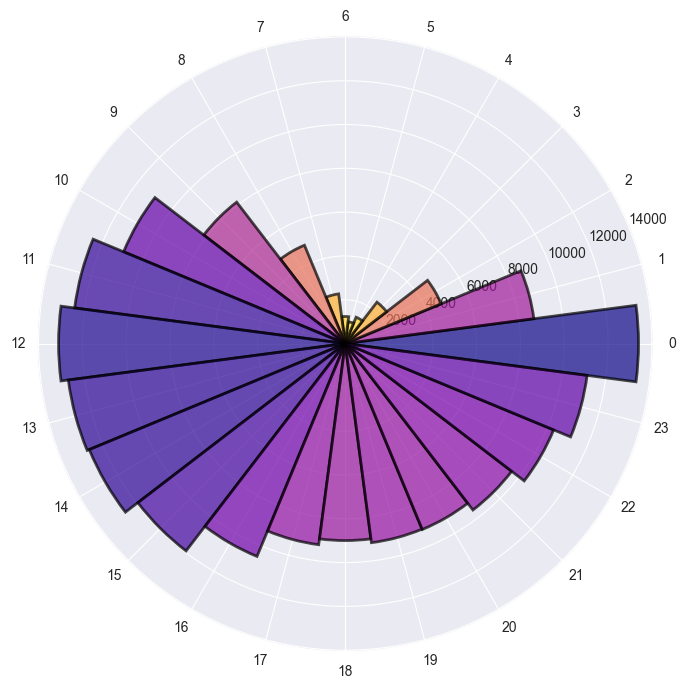

In [50]:
order_hours = dff_orders['DateTime_CartFinalize'].dt.hour
order_hours = order_hours.value_counts().reset_index()
order_hours = order_hours.rename(columns={'DateTime_CartFinalize':'hour'})
order_hours = order_hours.sort_values(by=['hour'])

# Number of data points
N = order_hours.shape[0]
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# Categories (hourly data)
categories = order_hours['hour']

# Add a new column 'radar_angles' for the angle corresponding to each hour
order_hours['radar_angles'] = theta

# Plotting the polar chart
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Define custom colors based on the count (or you can choose any color scale)
colors = plt.cm.plasma_r(order_hours['count'] / max(order_hours['count']))

# Bar plot on polar axes with custom width and colors
bars = ax.bar(order_hours['radar_angles'], order_hours['count'], width=2 * np.pi / N,
              linewidth=2, edgecolor='k', alpha=0.7, color=colors)

ax.set_xticks(theta)
ax.set_xticklabels(categories)

plt.show()

## 5. 10. Popular day

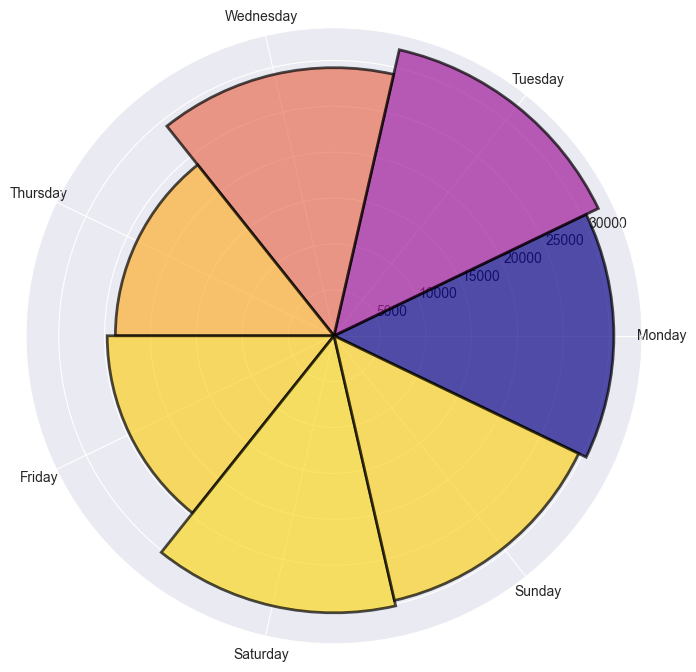

In [51]:
series1 = dff_orders['DateTime_CartFinalize'].dt.dayofweek
series2 = dff_orders['DateTime_CartFinalize'].dt.day_name()
order_days = pd.DataFrame({'dayofweek': series1, 'day_name': series2})
order_days = order_days.value_counts().reset_index()
order_days = order_days.rename(columns={'DateTime_CartFinalize':'day'})
order_days = order_days.sort_values(by=['dayofweek'])

N = order_days.shape[0]
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

categories = order_days['day_name']

order_days['radar_angles'] = theta

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

colors = plt.cm.plasma_r(order_hours['count'] / max(order_hours['count']))

bars = ax.bar(order_days['radar_angles'], order_days['count'], width=2 * np.pi / N,
              linewidth=2, edgecolor='k', alpha=0.7, color=colors)

ax.set_xticks(theta)
ax.set_xticklabels(categories)

plt.show()

# END!

Man 2 - 3 ruze kamel baraye in notebook vaqt gozashtam va haminqadr forsat kardam amade konam. Be nazaram ba merge kardane Products ba Orders mishod tahlil haye jalebtari ham anjam dad.

Omidvaram dar ayandeh forsat konam anjamesh bedam. ^_^